#### Initial imports

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [297]:
import warnings
warnings.filterwarnings('ignore')

##### 1. Merge all months csv into a single df

In [298]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

In [299]:
df.shape

(18383, 6)

In [300]:
import os

# Creating a list of paths for all the files to merge

months = os.listdir('../SalesAnalysis/Sales_Data')
all_months = [''.join(('./Sales_Data/', month)) for month in months]

all_months

['./Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_June_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_September_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_February_2019.csv']

In [301]:
# Merging csv's into a single dataframe

df2 = pd.concat(
    map(pd.read_csv, all_months ), ignore_index=True)

In [302]:
df2.dropna(inplace=True)
df2.shape


(186305, 6)

In [303]:
df2 = df2[df2['Order Date'] != 'Order Date']
df2.shape


(185950, 6)

##### Question 1: What was the best month for sales? How much was earned that month?


In [304]:
# Cleanig data (casting datatypes)

df2['Order Date'] = pd.to_datetime(df2['Order Date'], format="%m/%d/%y %H:%M")

In [305]:
df2.sort_values(['Quantity Ordered'], ascending=False).head()
# Just trying to see which product is bought in bulk the most

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
98820,227096,AAA Batteries (4-pack),9,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016"
42988,211097,AAA Batteries (4-pack),9,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001"
98184,226483,AAA Batteries (4-pack),9,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016"
96322,224719,AAA Batteries (4-pack),8,2.99,2019-07-26 23:59:00,"876 Adams St, San Francisco, CA 94016"
141394,261442,AAA Batteries (4-pack),8,2.99,2019-10-16 20:31:00,"36 Center St, Boston, MA 02215"


In [306]:
# New column: Month (month of sale)

df2['month'] = df2['Order Date'].apply(lambda x: x.month)

In [307]:
# Cleanig data (casting datatypes)

df2['Quantity Ordered'] = df2['Quantity Ordered'].apply(lambda x: int(x))
df2['Price Each'] = df2['Price Each'].apply(lambda x: float(x))

In [308]:
# New column: Sale

df2['Sale'] = df2['Price Each'] * df2['Quantity Ordered']

In [309]:
df2[['Sale', 'month']].groupby(['month']).sum().sort_values(by=['Sale'], ascending=False)

,Sale
month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


##### Question 1: What was the best month for sales? How much was earned that month?
    * Answer: December. $4.6m 

##### Question 2: What city sold the most product? 

In [310]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [311]:
# New column of just the city name

df2['City'] = df2['Purchase Address'].apply(lambda x: x.split(',')[1])

In [312]:
df2[['Quantity Ordered', 'City', 'Sale']].groupby(['City']).sum().sort_values(['Quantity Ordered'],ascending=False)

,Quantity Ordered,Sale
City,,
San Francisco,50239,8262203.91
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Boston,22528,3661642.01
Dallas,16730,2767975.40
Atlanta,16602,2795498.58
Seattle,16553,2747755.48
Portland,14053,2320490.61
Austin,11153,1819581.75


##### Question 2: What city sold the most product? 
    * Answer: San Fransisco. It also makes sense that the city that sold the most product, would also have made the most in sales. An intuitive assumption, but not always the case. 

##### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [313]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


##### It would probably be a lot easier to answer this one if the data can be visualized. Especially considering that it's continuous

In [314]:
# New colummn of hour of sale

df2['hour_of_sale'] = df2['Order Date'].apply(lambda x: x.hour)

In [315]:
# Df to use to plot data

df_hour_of_sale = df2[['hour_of_sale', 'Sale']].groupby(['hour_of_sale']).sum().sort_values(['hour_of_sale'])

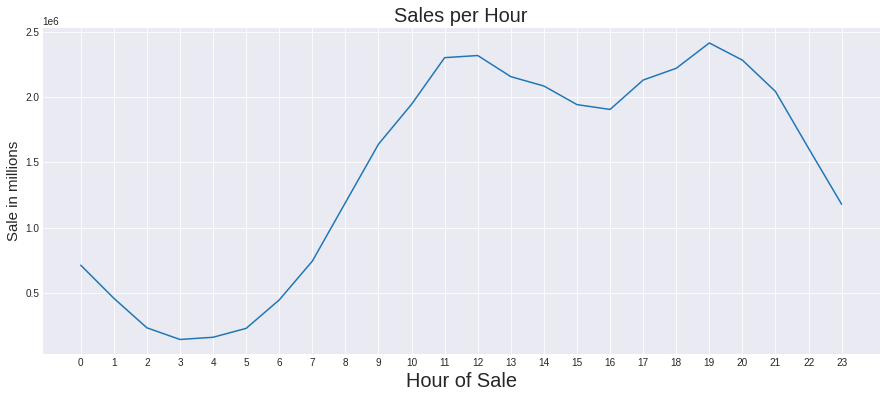

In [316]:
# Plot data to beter see what's going on 

fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('seaborn-dark')
ax.grid()
ax.set_xlabel('Hour of Sale', fontsize=20)
ax.set_ylabel('Sale in millions', fontsize=15)
ax.set_title('Sales per Hour', fontsize=20)
ax.set_xticks(list(df_hour_of_sale.index))
ax.plot(list(df_hour_of_sale.index), list(df_hour_of_sale.values))  # Plot some data on the axes.


##### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?
    * Answer: 16:00 - 19:00.
    * Most sales seem to come at 19:00, and so advertising a few hours before that period might maximize likelihood of sales. The same approach could be applied to the sale spike around 11:00

##### Question 4: What products are most often sold together?

In [317]:
# Retrieve only rows which share the same Order ID and save to new df

df2[df2['Order ID'].duplicated(keep=False)][['Order ID', 'Product']]

,Order ID,Product
16,295681,Google Phone
17,295681,USB-C Charging Cable
18,295681,Bose SoundSport Headphones
19,295681,Wired Headphones
36,295698,Vareebadd Phone
...,...,...
186799,161960,USB-C Charging Cable
186811,161972,Google Phone
186812,161972,USB-C Charging Cable
186837,161997,Google Phone


In [318]:
# Retrieve only rows which share the same Order ID and save to new df
df_many_products = df2[df2['Order ID'].duplicated(keep=False)][['Order ID', 'Product']].groupby(['Order ID'])['Product'].apply(list)

In [319]:
df_many_products.head()


Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
Name: Product, dtype: object

In [320]:
# Import modules
from collections import Counter
from itertools import combinations


In [321]:
top_combo = Counter()

for elem in df_many_products.values:

   if len(elem) < 2:
      continue

   elem.sort()

   for size in range(2, len(elem) + 1):
      for comb in combinations(elem, size):
         top_combo[comb] += 1


In [322]:
top_combo.most_common()[:5]

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373)]

##### Question 4: What products are most often sold together?
    * The Lightning Charging Cable and iPhone are the products sold together most often.

##### Question 5: What product sold the most? Why do you think it sold the most?

In [323]:
df2['Product'].value_counts().head()

USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

In [324]:
df2[df2['Product']=='USB-C Charging Cable'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,City,hour_of_sale
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
10,295675,USB-C Charging Cable,2,11.95,2019-12-13 13:52:00,"594 1st St, San Francisco, CA 94016",12,23.90,San Francisco,13


##### Question 5: What product sold the most? Why do you think it sold the most?
    * Answer: The "USB-C Charging Cable" sold the most. I think it sells as much as it does because they break regularly and they are arguably inexpensive. USB-C Charging Cables are used to charge a variety of devices. 